In [90]:
import requests, pandas as pd, numpy as np
from pandas import DataFrame
from io import StringIO
import time, json
from datetime import date
import statsmodels
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt
%matplotlib inline
from keras.layers import Dropout
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [91]:
transactions_im = pd.read_csv('transactions_cluster1.csv', header=0)

In [92]:
transactions = transactions_im.fillna(0)

In [93]:
transactions['date'] = pd.to_datetime(transactions['date'], format = '%Y-%m-%d')
transactions = transactions.set_index('date')

In [94]:
ts = transactions.mean(axis=1)
ts.head()

date
2017-04-20    1228.541667
2017-04-21    1284.500000
2017-04-22    1427.333333
2017-04-23    1399.958333
2017-04-24    1249.500000
dtype: float64

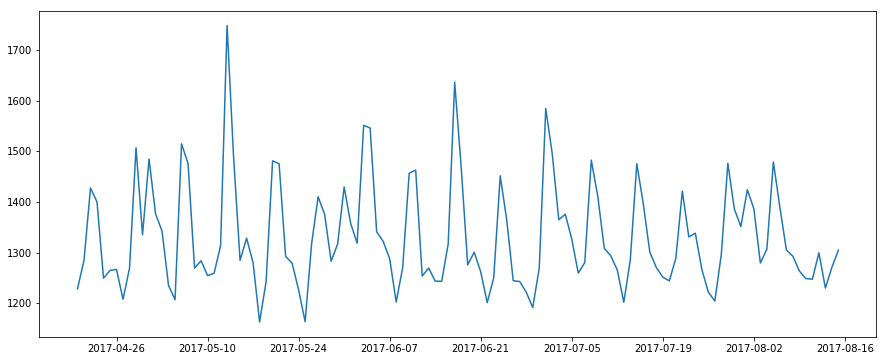

In [95]:
plt.plot(ts.index.to_pydatetime(), ts.values)

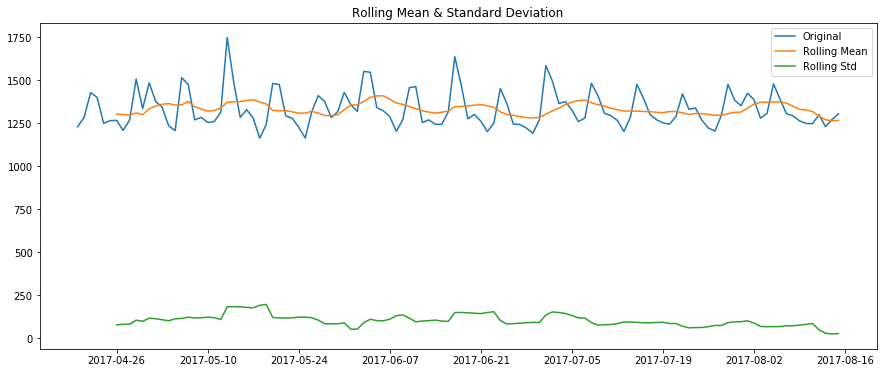

In [96]:
rolmean = ts.rolling(window=7).mean()
rolstd = ts.rolling(window=7).std()

#Plot rolling statistics:
orig = plt.plot(ts, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [97]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=10)
    rolstd = pd.rolling_std(timeseries, window=10)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).std()
  """


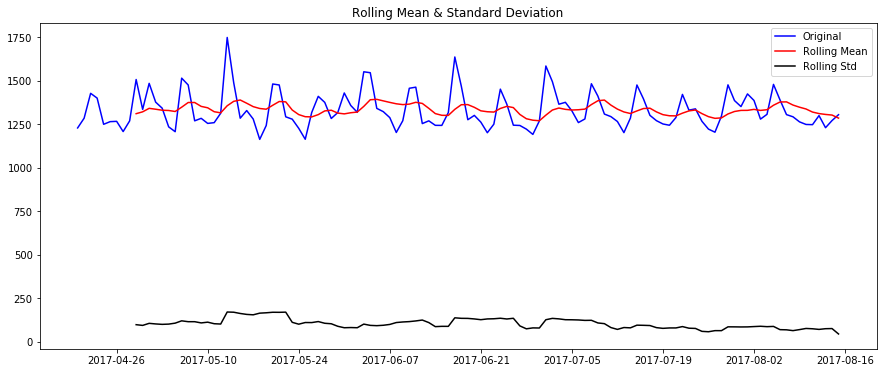

Results of Dickey-Fuller Test:
Test Statistic                  -2.438180
p-value                          0.131249
#Lags Used                      13.000000
Number of Observations Used    104.000000
Critical Value (1%)             -3.494850
Critical Value (5%)             -2.889758
Critical Value (10%)            -2.581822
dtype: float64


In [98]:
test_stationarity(ts)

In [99]:
ts_log = np.log(ts)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).std()
  """


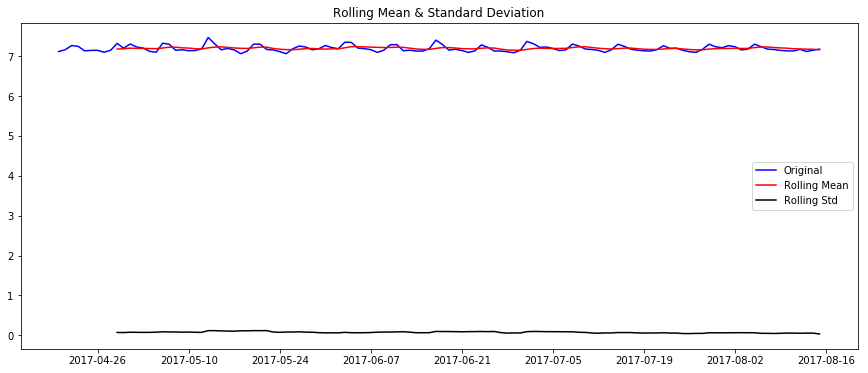

Results of Dickey-Fuller Test:
Test Statistic                  -2.508179
p-value                          0.113497
#Lags Used                      13.000000
Number of Observations Used    104.000000
Critical Value (1%)             -3.494850
Critical Value (5%)             -2.889758
Critical Value (10%)            -2.581822
dtype: float64


In [100]:
test_stationarity(ts_log)

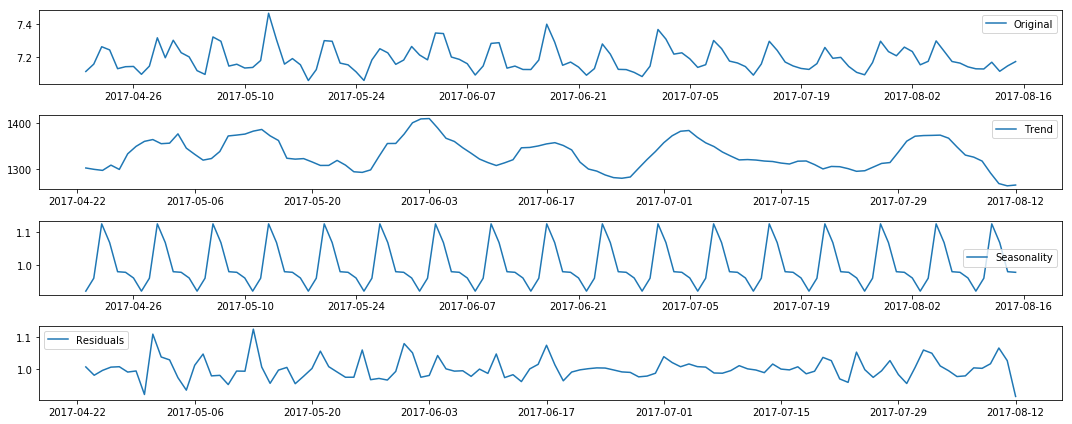

In [101]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts,model='multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

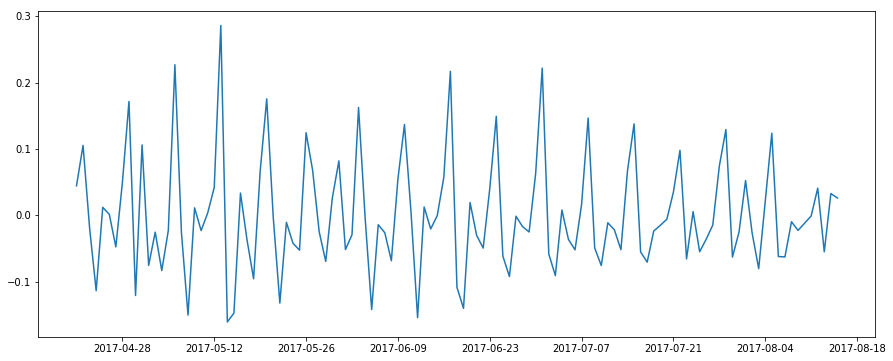

In [102]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff.index.to_pydatetime(), ts_log_diff.values)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).std()
  """


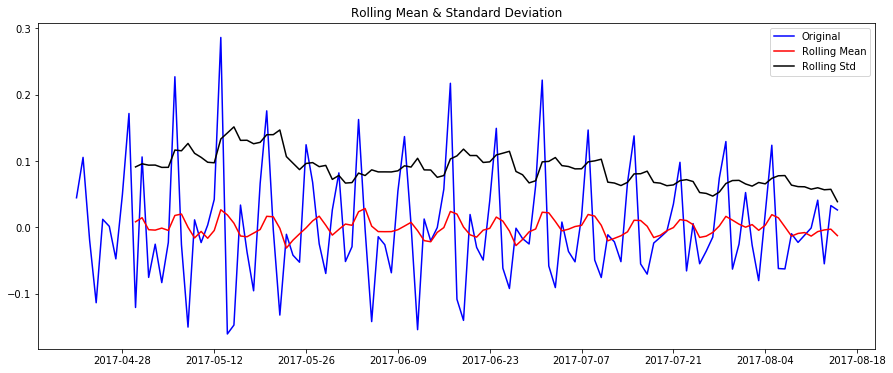

Results of Dickey-Fuller Test:
Test Statistic                -7.006284e+00
p-value                        7.108320e-10
#Lags Used                     1.200000e+01
Number of Observations Used    1.040000e+02
Critical Value (1%)           -3.494850e+00
Critical Value (5%)           -2.889758e+00
Critical Value (10%)          -2.581822e+00
dtype: float64


In [103]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

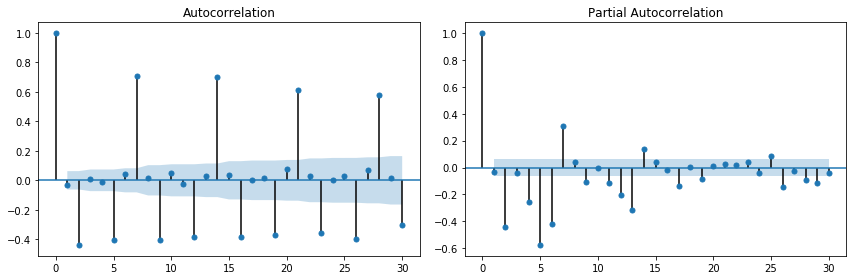

In [104]:
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(ts_log_diff, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(ts_log_diff, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

In [105]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy as np

In [106]:
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

In [107]:
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

In [108]:
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
        model.reset_states()
    return model
 
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]

In [109]:
supervised = timeseries_to_supervised(ts_log_diff, 1)
supervised_values = supervised.values

In [110]:
# split into train and test sets
train_size = int(len(supervised_values) * 0.7)
test_size = len(supervised_values) - train_size
train, test = supervised_values[0:train_size,:], supervised_values[train_size:len(supervised_values),:]
print(len(train), len(test))

81 36


In [111]:
scaler, train_scaled, test_scaled = scale(train, test)

In [112]:
lstm_model = fit_lstm(train_scaled, 3, 2500, 25)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
trainPred=lstm_model.predict(train_reshaped, batch_size=3)

In [113]:
test_reshaped = test_scaled[:, 0].reshape(len(test_scaled), 1, 1)
testPred=lstm_model.predict(test_reshaped, batch_size=3)

In [114]:
train_reshaped=trainPred.tolist()

In [115]:
trainflatten= [y for x in train_reshaped for y in x]

In [116]:
test_reshaped=testPred.tolist()

In [117]:
testflatten= [y for x in test_reshaped for y in x]

In [118]:
predictions=pd.DataFrame(trainflatten)

In [119]:
predictions=predictions.append(testflatten)

In [120]:
predictions['date']=transactions.index[1:]

In [121]:
predictions['date']=pd.to_datetime(predictions['date'], format = '%Y-%m-%d')

In [122]:
predictions=predictions.set_index('date')

In [123]:
predictions_LSTM_diff_cumsum = predictions.cumsum()
predictions_LSTM_log = pd.Series(ts_log.iloc[0], index=ts_log.index)

In [124]:
predictions_LSTM_diff_cumsum=predictions_LSTM_diff_cumsum.T.iloc[0]

In [125]:
predictions_LSTM_log = predictions_LSTM_log.add(predictions_LSTM_diff_cumsum,fill_value=0)

In [126]:
predictions_LSTM = np.exp(predictions_LSTM_log)

Text(0.5,1,'RMSE: 1296.7992')

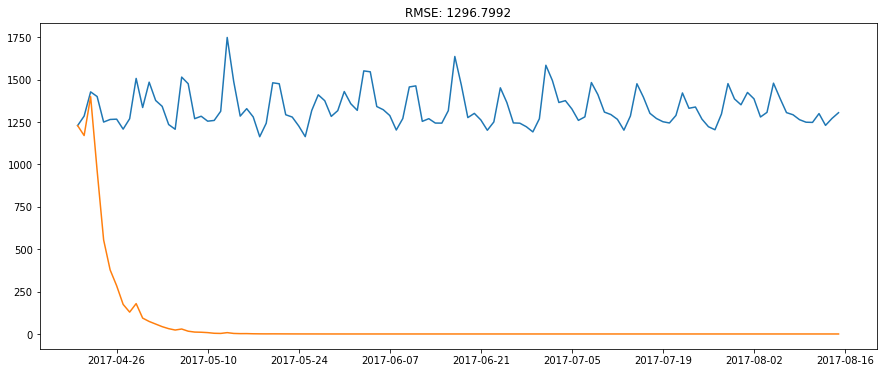

In [127]:
plt.plot(ts.index.to_pydatetime(), ts.values)
plt.plot(ts.index.to_pydatetime(), predictions_LSTM.values)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_LSTM-ts)**2)/len(ts)))

In [128]:
expected=list(ts)

In [129]:
predictions=predictions.T.iloc[0]

In [130]:
bias=[expected[i]-predictions[i] for i in range(len(predictions))]

In [131]:
mean_forcast_error=sum(bias)/len(bias)
print('Mean forcast error: %f' % mean_forcast_error)

Mean forcast error: 1331.204173


In [132]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(expected[1:], predictions)
print('MAE: %f' % mae)

MAE: 1331.854102
